Accuracy : 0.9333
Precision: 0.9444
Recall   : 0.9333

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


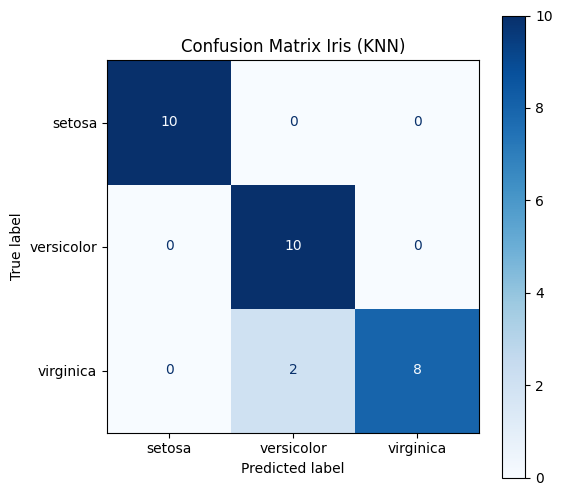

In [1]:
# 1. Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay
)

# 2. Load data Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# 3. Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Inisialisasi dan training KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# 5. Prediksi pada test set
y_pred = knn.predict(X_test)

# 6. Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print("\nConfusion Matrix:")
print(cm)

# 7. Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix Iris (KNN)")
plt.show()

Nilai K terbaik: 3
Akurasi tertinggi: 1.0000


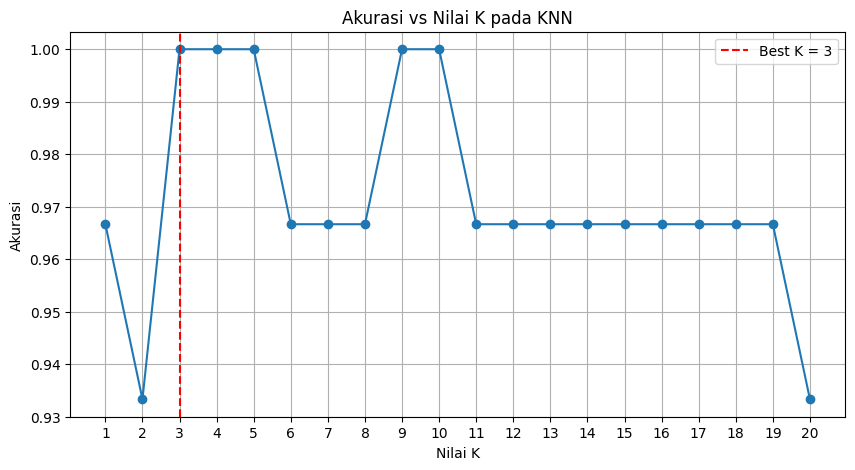

In [2]:
# 1. Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 2. Load dataset Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

# 3. Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Cari nilai K terbaik berdasarkan akurasi
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 5. Menentukan K dengan akurasi tertinggi
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)

print(f"Nilai K terbaik: {best_k}")
print(f"Akurasi tertinggi: {best_acc:.4f}")

# 6. Plot K vs Akurasi
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Akurasi vs Nilai K pada KNN')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.show()

Accuracy : 0.6903
Precision: 0.6707
Recall   : 0.6609

Confusion Matrix:
[[130  35]
 [ 48  55]]


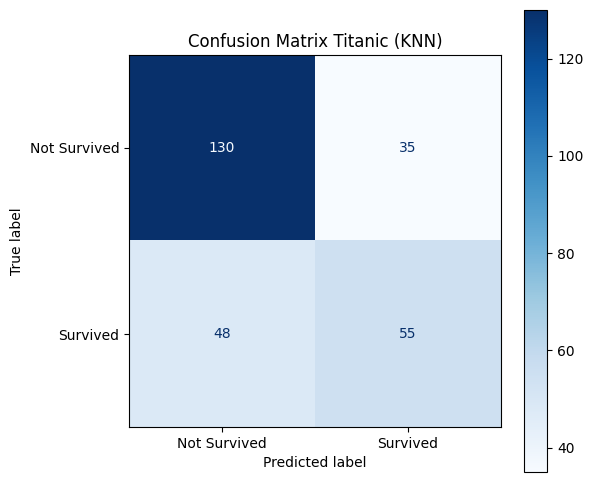


=== PERHITUNGAN MANUAL ===
Accuracy = (TP semua kelas) / Total sampel
Accuracy = (130 + 55) / 268 = 0.6903

Precision = TP / (TP + FP)
Precision (Not Survived) = 130 / (130 + 48) = 0.7303
Precision (Survived) = 55 / (55 + 35) = 0.6111
Macro-average Precision = (0.7303 + 0.6111) / 2 = 0.6707

Recall = TP / (TP + FN)
Recall (Not Survived) = 130 / (130 + 35) = 0.7879
Recall (Survived) = 55 / (55 + 48) = 0.5340
Macro-average Recall = (0.7879 + 0.5340) / 2 = 0.6609

Nilai K terbaik: 1
Akurasi tertinggi: 0.7127


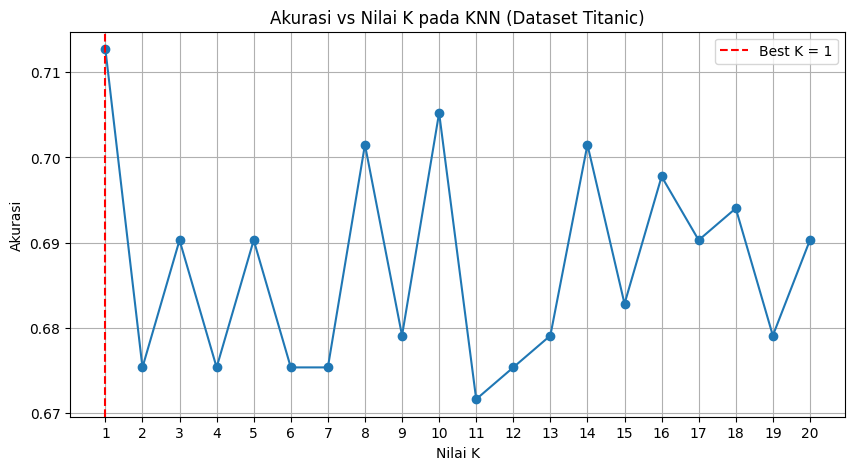


=== EKSPERIMEN KOMBINASI ATRIBUT ===
Akurasi dengan fitur demografis: 0.6791
Akurasi dengan fitur ekonomi: 0.6604
Akurasi dengan fitur keluarga: 0.6604
Akurasi dengan semua fitur: 0.7127


In [5]:
# Latihan 1: KNN Classification pada Dataset Titanic
# 1. Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# 2. Load data Titanic
df = pd.read_csv('train.csv')
df.head()

# Preprocessing data
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].copy()
y = df['Survived'].values

# Encoding fitur kategorikal
le_sex = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex'].fillna('missing'))

le_embarked = LabelEncoder()
X['Embarked'] = le_embarked.fit_transform(X['Embarked'].fillna('missing'))

# Imputasi nilai yang hilang
imputer = SimpleImputer(strategy='median')
X['Age'] = imputer.fit_transform(X[['Age']])
X['Fare'] = imputer.fit_transform(X[['Fare']])

class_names = ['Not Survived', 'Survived']

# 3. Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Inisialisasi dan training KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 5. Prediksi pada test set
y_pred = knn.predict(X_test)

# 6. Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print("\nConfusion Matrix:")
print(cm)

# 7. Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix Titanic (KNN)")
plt.show()

# 8. Perhitungan manual menggunakan rumus
print("\n=== PERHITUNGAN MANUAL ===")
print("Accuracy = (TP semua kelas) / Total sampel")
TP_not_survived = cm[0, 0]  # True Positive untuk kelas "Not Survived" (0)
TP_survived = cm[1, 1]      # True Positive untuk kelas "Survived" (1)
total_samples = np.sum(cm)
manual_acc = (TP_not_survived + TP_survived) / total_samples
print(f"Accuracy = ({TP_not_survived} + {TP_survived}) / {total_samples} = {manual_acc:.4f}")

print("\nPrecision = TP / (TP + FP)")
# Precision untuk kelas "Not Survived" (0)
TP_not_survived = cm[0, 0]
FP_not_survived = cm[1, 0]  # False Positive: sebenarnya "Survived" tapi diprediksi "Not Survived"
precision_not_survived = TP_not_survived / (TP_not_survived + FP_not_survived)
print(f"Precision (Not Survived) = {TP_not_survived} / ({TP_not_survived} + {FP_not_survived}) = {precision_not_survived:.4f}")

# Precision untuk kelas "Survived" (1)
TP_survived = cm[1, 1]
FP_survived = cm[0, 1]  # False Positive: sebenarnya "Not Survived" tapi diprediksi "Survived"
precision_survived = TP_survived / (TP_survived + FP_survived)
print(f"Precision (Survived) = {TP_survived} / ({TP_survived} + {FP_survived}) = {precision_survived:.4f}")

# Macro-average Precision
macro_precision = (precision_not_survived + precision_survived) / 2
print(f"Macro-average Precision = ({precision_not_survived:.4f} + {precision_survived:.4f}) / 2 = {macro_precision:.4f}")

print("\nRecall = TP / (TP + FN)")
# Recall untuk kelas "Not Survived" (0)
TP_not_survived = cm[0, 0]
FN_not_survived = cm[0, 1]  # False Negative: sebenarnya "Not Survived" tapi diprediksi "Survived"
recall_not_survived = TP_not_survived / (TP_not_survived + FN_not_survived)
print(f"Recall (Not Survived) = {TP_not_survived} / ({TP_not_survived} + {FN_not_survived}) = {recall_not_survived:.4f}")

# Recall untuk kelas "Survived" (1)
TP_survived = cm[1, 1]
FN_survived = cm[1, 0]  # False Negative: sebenarnya "Survived" tapi diprediksi "Not Survived"
recall_survived = TP_survived / (TP_survived + FN_survived)
print(f"Recall (Survived) = {TP_survived} / ({TP_survived} + {FN_survived}) = {recall_survived:.4f}")

# Macro-average Recall
macro_recall = (recall_not_survived + recall_survived) / 2
print(f"Macro-average Recall = ({recall_not_survived:.4f} + {recall_survived:.4f}) / 2 = {macro_recall:.4f}")

# 9. Cari nilai K terbaik berdasarkan akurasi
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 10. Menentukan K dengan akurasi tertinggi
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)

print(f"\nNilai K terbaik: {best_k}")
print(f"Akurasi tertinggi: {best_acc:.4f}")

# 11. Plot K vs Akurasi
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Akurasi vs Nilai K pada KNN (Dataset Titanic)')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.show()

# 12. Eksperimen dengan kombinasi atribut tertentu
print("\n=== EKSPERIMEN KOMBINASI ATRIBUT ===")

# Kombinasi 1: Hanya fitur demografis
X_demo = X[['Pclass', 'Sex', 'Age']].copy()
X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(
    X_demo, y, test_size=0.3, random_state=42, stratify=y
)

knn_demo = KNeighborsClassifier(n_neighbors=best_k)
knn_demo.fit(X_train_demo, y_train_demo)
y_pred_demo = knn_demo.predict(X_test_demo)
acc_demo = accuracy_score(y_test_demo, y_pred_demo)

print(f"Akurasi dengan fitur demografis: {acc_demo:.4f}")

# Kombinasi 2: Hanya fitur ekonomi
X_econ = X[['Pclass', 'Fare']].copy()
X_train_econ, X_test_econ, y_train_econ, y_test_econ = train_test_split(
    X_econ, y, test_size=0.3, random_state=42, stratify=y
)

knn_econ = KNeighborsClassifier(n_neighbors=best_k)
knn_econ.fit(X_train_econ, y_train_econ)
y_pred_econ = knn_econ.predict(X_test_econ)
acc_econ = accuracy_score(y_test_econ, y_pred_econ)

print(f"Akurasi dengan fitur ekonomi: {acc_econ:.4f}")

# Kombinasi 3: Fitur keluarga
X_family = X[['SibSp', 'Parch']].copy()
X_train_family, X_test_family, y_train_family, y_test_family = train_test_split(
    X_family, y, test_size=0.3, random_state=42, stratify=y
)

knn_family = KNeighborsClassifier(n_neighbors=best_k)
knn_family.fit(X_train_family, y_train_family)
y_pred_family = knn_family.predict(X_test_family)
acc_family = accuracy_score(y_test_family, y_pred_family)

print(f"Akurasi dengan fitur keluarga: {acc_family:.4f}")
print(f"Akurasi dengan semua fitur: {best_acc:.4f}")

Manhattan - Nilai K terbaik: 3
Manhattan - Akurasi tertinggi: 0.7276
Minkowski - Nilai K terbaik: 16
Minkowski - Akurasi tertinggi: 0.6978
Cosine - Nilai K terbaik: 8
Cosine - Akurasi tertinggi: 0.7090
Euclidean - Nilai K terbaik: 1
Euclidean - Akurasi tertinggi: 0.7127


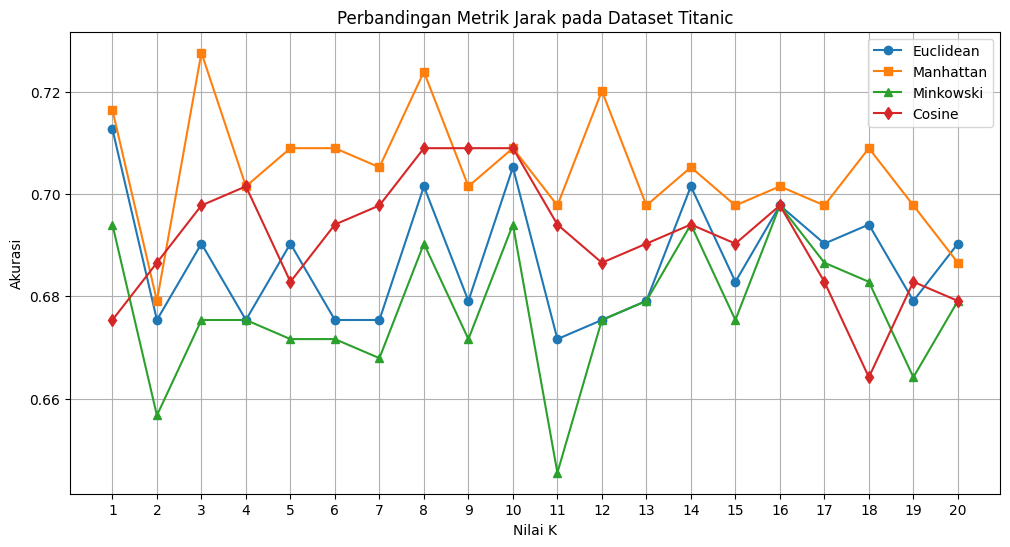


Metrik jarak terbaik: Manhattan
Akurasi terbaik: 0.7276


In [7]:
# Latihan 2: Perbandingan metrik jarak pada Dataset Titanic
# 1. Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# 2. Load dataset Titanic
df = pd.read_csv('train.csv')
df.head()

# Preprocessing data
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].copy()
y = df['Survived'].values

# Encoding fitur kategorikal
le_sex = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex'].fillna('missing'))

le_embarked = LabelEncoder()
X['Embarked'] = le_embarked.fit_transform(X['Embarked'].fillna('missing'))

# Imputasi nilai yang hilang
imputer = SimpleImputer(strategy='median')
X['Age'] = imputer.fit_transform(X[['Age']])
X['Fare'] = imputer.fit_transform(X[['Fare']])

# 3. Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Test metrik jarak Manhattan
k_values = range(1, 21)
accuracies_manhattan = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_manhattan.append(acc)

best_k_manhattan = k_values[np.argmax(accuracies_manhattan)]
best_acc_manhattan = max(accuracies_manhattan)

print(f"Manhattan - Nilai K terbaik: {best_k_manhattan}")
print(f"Manhattan - Akurasi tertinggi: {best_acc_manhattan:.4f}")

# 5. Test metrik jarak Minkowski
accuracies_minkowski = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_minkowski.append(acc)

best_k_minkowski = k_values[np.argmax(accuracies_minkowski)]
best_acc_minkowski = max(accuracies_minkowski)

print(f"Minkowski - Nilai K terbaik: {best_k_minkowski}")
print(f"Minkowski - Akurasi tertinggi: {best_acc_minkowski:.4f}")

# 6. Test metrik jarak Cosine
accuracies_cosine = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_cosine.append(acc)

best_k_cosine = k_values[np.argmax(accuracies_cosine)]
best_acc_cosine = max(accuracies_cosine)

print(f"Cosine - Nilai K terbaik: {best_k_cosine}")
print(f"Cosine - Akurasi tertinggi: {best_acc_cosine:.4f}")

# 7. Test metrik jarak Euclidean (default)
accuracies_euclidean = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_euclidean.append(acc)

best_k_euclidean = k_values[np.argmax(accuracies_euclidean)]
best_acc_euclidean = max(accuracies_euclidean)

print(f"Euclidean - Nilai K terbaik: {best_k_euclidean}")
print(f"Euclidean - Akurasi tertinggi: {best_acc_euclidean:.4f}")

# 8. Plot perbandingan semua metrik
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies_euclidean, marker='o', linestyle='-', label='Euclidean')
plt.plot(k_values, accuracies_manhattan, marker='s', linestyle='-', label='Manhattan')
plt.plot(k_values, accuracies_minkowski, marker='^', linestyle='-', label='Minkowski')
plt.plot(k_values, accuracies_cosine, marker='d', linestyle='-', label='Cosine')
plt.title('Perbandingan Metrik Jarak pada Dataset Titanic')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# 9. Tentukan metrik terbaik
metrics_results = {
    'Euclidean': best_acc_euclidean,
    'Manhattan': best_acc_manhattan,
    'Minkowski': best_acc_minkowski,
    'Cosine': best_acc_cosine
}

best_metric = max(metrics_results, key=metrics_results.get)
best_metric_acc = metrics_results[best_metric]

print(f"\nMetrik jarak terbaik: {best_metric}")
print(f"Akurasi terbaik: {best_metric_acc:.4f}")

Tanpa Normalisasi - Nilai K terbaik: 1
Tanpa Normalisasi - Akurasi tertinggi: 0.7127
Dengan MinMax Normalisasi - Nilai K terbaik: 3
Dengan MinMax Normalisasi - Akurasi tertinggi: 0.8284


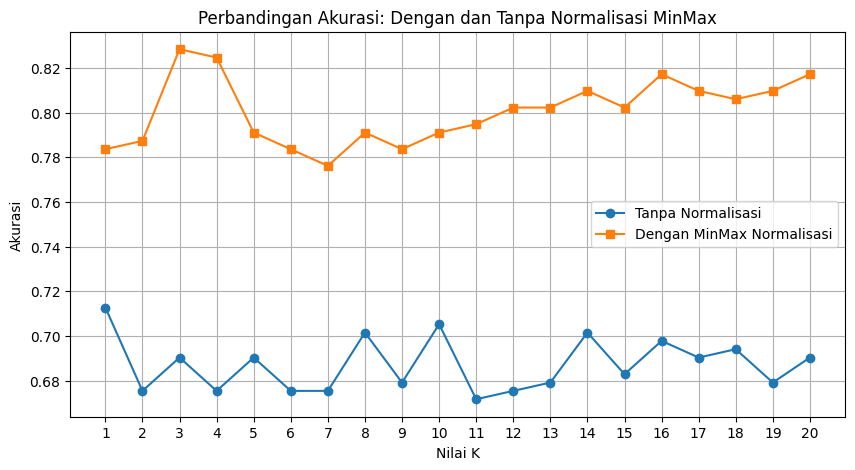


Perbandingan hasil:
Akurasi tanpa normalisasi: 0.7127
Akurasi dengan normalisasi: 0.8284
Peningkatan: 0.1157 (16.23%)
Normalisasi MinMax memberikan hasil yang LEBIH BAIK


In [9]:
# Latihan 3: Pengaruh normalisasi data pada Dataset Titanic
# 1. Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# 2. Load dataset Titanic
df = pd.read_csv('train.csv')
df.head()

# Preprocessing data
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].copy()
y = df['Survived'].values

# Encoding fitur kategorikal
le_sex = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex'].fillna('missing'))

le_embarked = LabelEncoder()
X['Embarked'] = le_embarked.fit_transform(X['Embarked'].fillna('missing'))

# Imputasi nilai yang hilang
imputer = SimpleImputer(strategy='median')
X['Age'] = imputer.fit_transform(X[['Age']])
X['Fare'] = imputer.fit_transform(X[['Fare']])

# 3. Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Test TANPA normalisasi
k_values = range(1, 21)
accuracies_original = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_original.append(acc)

best_k_original = k_values[np.argmax(accuracies_original)]
best_acc_original = max(accuracies_original)

print(f"Tanpa Normalisasi - Nilai K terbaik: {best_k_original}")
print(f"Tanpa Normalisasi - Akurasi tertinggi: {best_acc_original:.4f}")

# 5. Test DENGAN normalisasi MinMax
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracies_minmax = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies_minmax.append(acc)

best_k_minmax = k_values[np.argmax(accuracies_minmax)]
best_acc_minmax = max(accuracies_minmax)

print(f"Dengan MinMax Normalisasi - Nilai K terbaik: {best_k_minmax}")
print(f"Dengan MinMax Normalisasi - Akurasi tertinggi: {best_acc_minmax:.4f}")

# 6. Plot perbandingan
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies_original, marker='o', linestyle='-', label='Tanpa Normalisasi')
plt.plot(k_values, accuracies_minmax, marker='s', linestyle='-', label='Dengan MinMax Normalisasi')
plt.title('Perbandingan Akurasi: Dengan dan Tanpa Normalisasi MinMax')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# 7. Analisis hasil
improvement = best_acc_minmax - best_acc_original
improvement_pct = (improvement / best_acc_original) * 100

print(f"\nPerbandingan hasil:")
print(f"Akurasi tanpa normalisasi: {best_acc_original:.4f}")
print(f"Akurasi dengan normalisasi: {best_acc_minmax:.4f}")
print(f"Peningkatan: {improvement:.4f} ({improvement_pct:.2f}%)")

if best_acc_minmax > best_acc_original:
    print("Normalisasi MinMax memberikan hasil yang LEBIH BAIK")
else:
    print("Normalisasi MinMax memberikan hasil yang LEBIH BURUK")